 #Customer 360 Analysis using Python

## Objective
To build a 360-degree customer profile by merging transaction,
product, and customer datasets to analyze purchasing behavior,
customer value, and engagement metrics.

## Tools Used
- Python
- Pandas
- NumPy
- Matplotlib / Seaborn

## Key Outcomes
- Customer lifetime value estimation
- Purchase frequency analysis
- High-value customer identification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)


In [2]:
import os
os.getcwd()


'C:\\Users\\sufia'

In [3]:
customer = pd.read_csv(r"C:\Users\sufia\Downloads\Machine Learning using Python (Online) JAN 2026 _ Class 3 Machine Learning using Python (Online) JAN 2026\Customer - 1768721917817.csv")
product = pd.read_csv(r"C:\Users\sufia\Downloads\Machine Learning using Python (Online) JAN 2026 _ Class 3 Machine Learning using Python (Online) JAN 2026\Product - 1768721917964.csv")
transactions = pd.read_csv(r"C:\Users\sufia\Downloads\Machine Learning using Python (Online) JAN 2026 _ Class 3 Machine Learning using Python (Online) JAN 2026\Transactions - 1768721918528.csv")



In [4]:
customer.head()



,Customer ID,Gender,first Date,recent date,Customer value,buy times,Points earned,Points redeemed
0,85498466,M,20120101,20120101,15.9000,1,135,NaN
1,14634939,M,20120102,20130227,4454.0996,35,2130,11.0
2,14860694,F,20120103,20130219,2756.2800,19,987,785.0
3,85570763,M,20120103,20120406,902.3000,6,240,NaN
4,85796047,M,20120106,20120106,39.8000,1,40,NaN


In [5]:
product.head(
    
)

,PRODUCT_ID,PRODUCT_CODE,merchant id,merchant_name_eng,Category_level2_name_eng,cost price,Category_code
0,973607,9736076,1,Delhi,Nutrition and health (No.1 Medicine Store),31.122,17
1,860,8606,1,Delhi,Beauty,7.500,12
2,861,8617,1,Delhi,Beauty,8.250,12
3,864,8640,1,Delhi,Beauty,11.925,12
4,865,8651,1,Delhi,Beauty,9.750,12


In [6]:
transactions.head()

,USER_ID,order id,merchant id,product id,order time,sale amount,sale price,sale number,web portal price,ACTIVITY ID
0,12592130,29501392,1,1143312,20120102,0.00,0.00,1,0.0,14647
1,36438353,29482570,1,1739650,20120102,0.00,0.00,1,69.0,14264
2,73897605,29453567,1,1288235,20120102,0.31,0.51,1,5.1,13679
3,85462069,29506684,1,964626,20120102,0.89,1.00,1,1.7,10885
4,70491566,29412642,1,14264,20120101,1.20,1.20,1,9.9,10818


In [7]:
customer.columns

Index(['Customer ID', 'Gender', 'first Date', 'recent date', 'Customer value',
       'buy times', 'Points earned', 'Points redeemed'],
      dtype='object')

In [8]:
transactions.columns

Index(['USER_ID', 'order id', 'merchant id', 'product id', 'order time',
       'sale amount', 'sale price', 'sale number', 'web portal price',
       'ACTIVITY ID'],
      dtype='object')

In [9]:
 transactions.merge(
    product,
    left_on="product id",
    right_on="PRODUCT_ID")



,USER_ID,order id,merchant id_x,product id,order time,sale amount,sale price,sale number,web portal price,ACTIVITY ID,PRODUCT_ID,PRODUCT_CODE,merchant id_y,merchant_name_eng,Category_level2_name_eng,cost price,Category_code
0,12592130,29501392,1,1143312,20120102,0.0,0.0,1,0.0,14647,1143312,11433128,1,Delhi,Nutrition and health,0.0,13
1,36438353,29482570,1,1739650,20120102,0.0,0.0,1,69.0,14264,1739650,17396508,1,Delhi,Mother and children,47.4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550132,6843775,107432203,1,6045246,20130331,59.0,59.0,1,59.0,999999999,6045246,60452462,1,Delhi,Mobile phones,48.0,4
1550133,6843775,107432203,1,3974589,20130331,0.0,0.0,1,39.0,71114,3974589,39745896,1,Delhi,Digital,0.0,5


In [10]:
cust_txn = transactions.groupby("USER_ID").agg(
    total_sales=("sale amount", "sum"),
    total_orders=("order id", "nunique"),
    total_items=("sale number", "sum"),
    avg_bill_value=("sale amount", "mean"),
    last_purchase=("order time", "max")
).reset_index()


In [11]:
cust_txn.head()

,USER_ID,total_sales,total_orders,total_items,avg_bill_value,last_purchase
0,347,444.00,4,47,17.076923,20130328
1,585,509871.48,58,19322,942.461146,20120515
2,885,2284.59,10,247,16.435899,20121206
3,1670,8092.17,35,553,25.771242,20130328
4,2188,200.50,1,51,14.321429,20120128


In [12]:
customer360 = customer.merge(
    cust_txn,
    left_on="Customer ID",
    right_on="USER_ID",
    how="left"
)


In [13]:
customer360.head()

,Customer ID,Gender,first Date,recent date,Customer value,buy times,Points earned,Points redeemed,USER_ID,total_sales,total_orders,total_items,avg_bill_value,last_purchase
0,85498466,M,20120101,20120101,15.9000,1,135,NaN,85498466,15.90,1,8,5.300000,20111230
1,14634939,M,20120102,20130227,4454.0996,35,2130,11.0,14634939,4454.08,40,324,21.727220,20130227
2,14860694,F,20120103,20130219,2756.2800,19,987,785.0,14860694,2756.28,22,164,23.557949,20130218
3,85570763,M,20120103,20120406,902.3000,6,240,NaN,85570763,902.30,8,43,30.076667,20120406
4,85796047,M,20120106,20120106,39.8000,1,40,NaN,85796047,39.80,1,2,39.800000,20120106


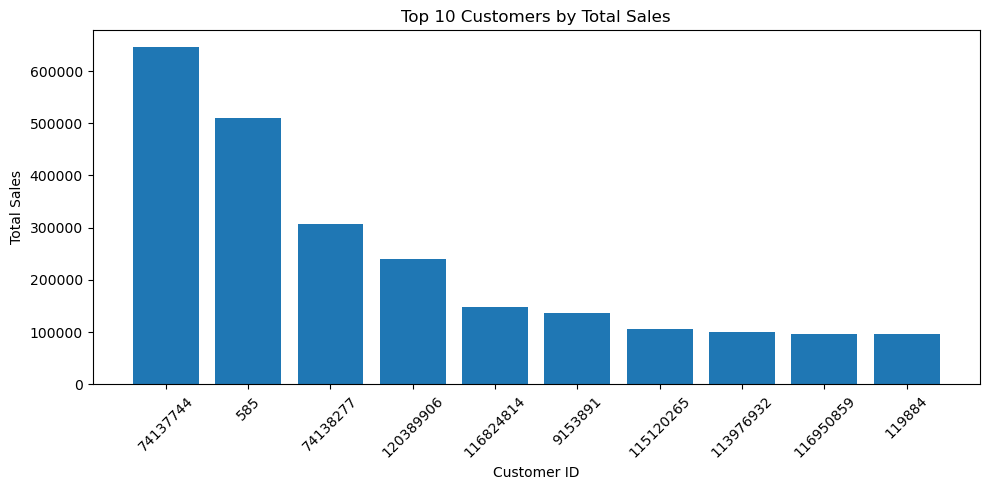

In [18]:
plt.figure(figsize=(10,5))
plt.bar(range(len(top_customers)), top_customers['total_sales'])
plt.xticks(range(len(top_customers)), top_customers['Customer ID'], rotation=45)
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.title('Top 10 Customers by Total Sales')
plt.tight_layout()
plt.show()

In [ ]:
customer360.to_csv("Customer360.csv", index=False)


## Key Insights & Conclusion

- High-value customers were identified based on total sales and order frequency  
- Average bill value helped differentiate customer segments  
- Final Customer360 dataset combines behavioral and transactional metrics  
- This analysis can support targeted marketing and retention strategies